# Clustering Analysis - Mall Customer Segmentation

This notebook explores and compares multiple clustering algorithms on the Mall Customer Segmentation dataset.

**Clustering Models:**
- K-Means (baseline)
- DBSCAN
- K-Medoids
- Agglomerative Clustering
- Gaussian Mixture Models

---

## Section 1: Exploratory Data Analysis and Data Preprocessing

This section performs comprehensive exploratory data analysis and prepares the data for modeling.

### Section 1.1: Exploratory Data Analysis

In this section, we'll:
- Load and inspect the dataset
- Perform statistical summaries
- Analyze correlations between features
- Identify outliers and missing values
- Visualize distributions and relationships

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Create output directory for visualizations
viz_dir = Path('visualizations')
viz_dir.mkdir(exist_ok=True)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")
print(f"Dataset path: {path}")

# Load the CSV file
data_path = Path(path) / 'Mall_Customers.csv'
df = pd.read_csv(data_path)

print(f"\nDataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset path: C:\Users\aicunningham\.cache\kagglehub\datasets\vjchoudhary7\customer-segmentation-tutorial-in-python\versions\1

Dataset loaded successfully!
Shape: (200, 5)

First few rows:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Basic Dataset Information

In [3]:
# Display dataset info
print("Dataset Information:")
print("=" * 50)
df.info()

print("\n" + "=" * 50)
print("\nColumn Names:")
print(df.columns.tolist())

print("\nDataset Shape:")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Column Names:
['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Dataset Shape:
Rows: 200
Columns: 5


#### Statistical Summary

In [4]:
# Statistical summary of numerical features
print("Statistical Summary of Numerical Features:")
print("=" * 50)
df.describe()

Statistical Summary of Numerical Features:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Statistical summary of categorical features
print("\nStatistical Summary of Categorical Features:")
print("=" * 50)
df.describe(include=['object'])


Statistical Summary of Categorical Features:


,Gender
count,200
unique,2
top,Female
freq,112


#### Missing Value Analysis

In [6]:
# Check for missing values
print("Missing Value Analysis:")
print("=" * 50)
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

print(missing_df)
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Missing Value Analysis:
                        Missing Count  Missing Percentage
CustomerID                          0                 0.0
Gender                              0                 0.0
Age                                 0                 0.0
Annual Income (k$)                  0                 0.0
Spending Score (1-100)              0                 0.0

Total missing values: 0


In [7]:
# Visualize missing values
if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
    plt.title('Missing Values Heatmap', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig(viz_dir / 'missing_values_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("No missing values detected in the dataset.")

No missing values detected in the dataset.


#### Categorical Feature Analysis

In [8]:
# Analyze categorical features
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Categorical Features Analysis:")
print("=" * 50)

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Value counts:")
    print(df[col].value_counts())
    print(f"\n  Percentage distribution:")
    print(df[col].value_counts(normalize=True) * 100)

Categorical Features Analysis:

Gender:
  Unique values: 2
  Value counts:
Gender
Female    112
Male       88
Name: count, dtype: int64

  Percentage distribution:
Gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64


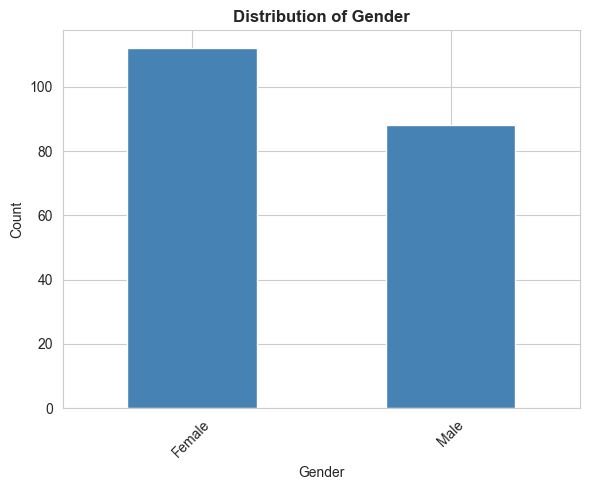

In [9]:
# Visualize categorical features
if len(categorical_cols) > 0:
    n_cols = len(categorical_cols)
    fig, axes = plt.subplots(1, n_cols, figsize=(6*n_cols, 5))
    
    if n_cols == 1:
        axes = [axes]
    
    for idx, col in enumerate(categorical_cols):
        df[col].value_counts().plot(kind='bar', ax=axes[idx], color='steelblue')
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col, fontsize=10)
        axes[idx].set_ylabel('Count', fontsize=10)
        axes[idx].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig(viz_dir / 'categorical_features_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

#### Distribution Analysis of Numerical Features

In [10]:
# Get numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("Numerical Features:")
print(numerical_cols)

Numerical Features:
['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


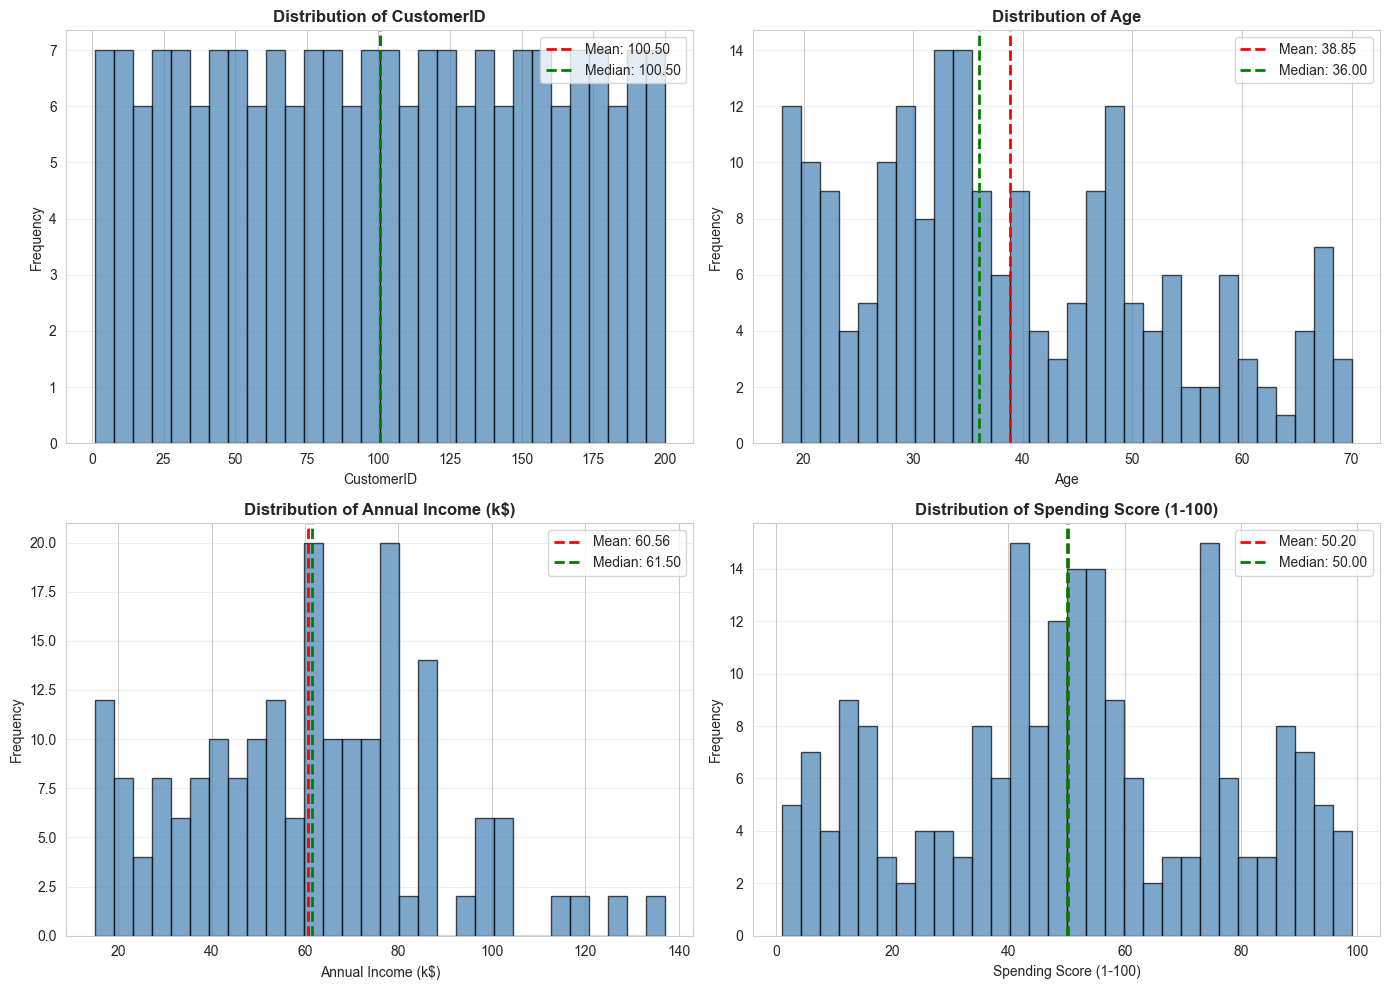

In [11]:
# Distribution plots for numerical features
n_cols = len(numerical_cols)
n_rows = (n_cols + 1) // 2

fig, axes = plt.subplots(n_rows, 2, figsize=(14, 5*n_rows))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[col].mean():.2f}')
    axes[idx].axvline(df[col].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df[col].median():.2f}')
    axes[idx].legend()
    axes[idx].grid(axis='y', alpha=0.3)

# Hide extra subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig(viz_dir / 'numerical_features_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

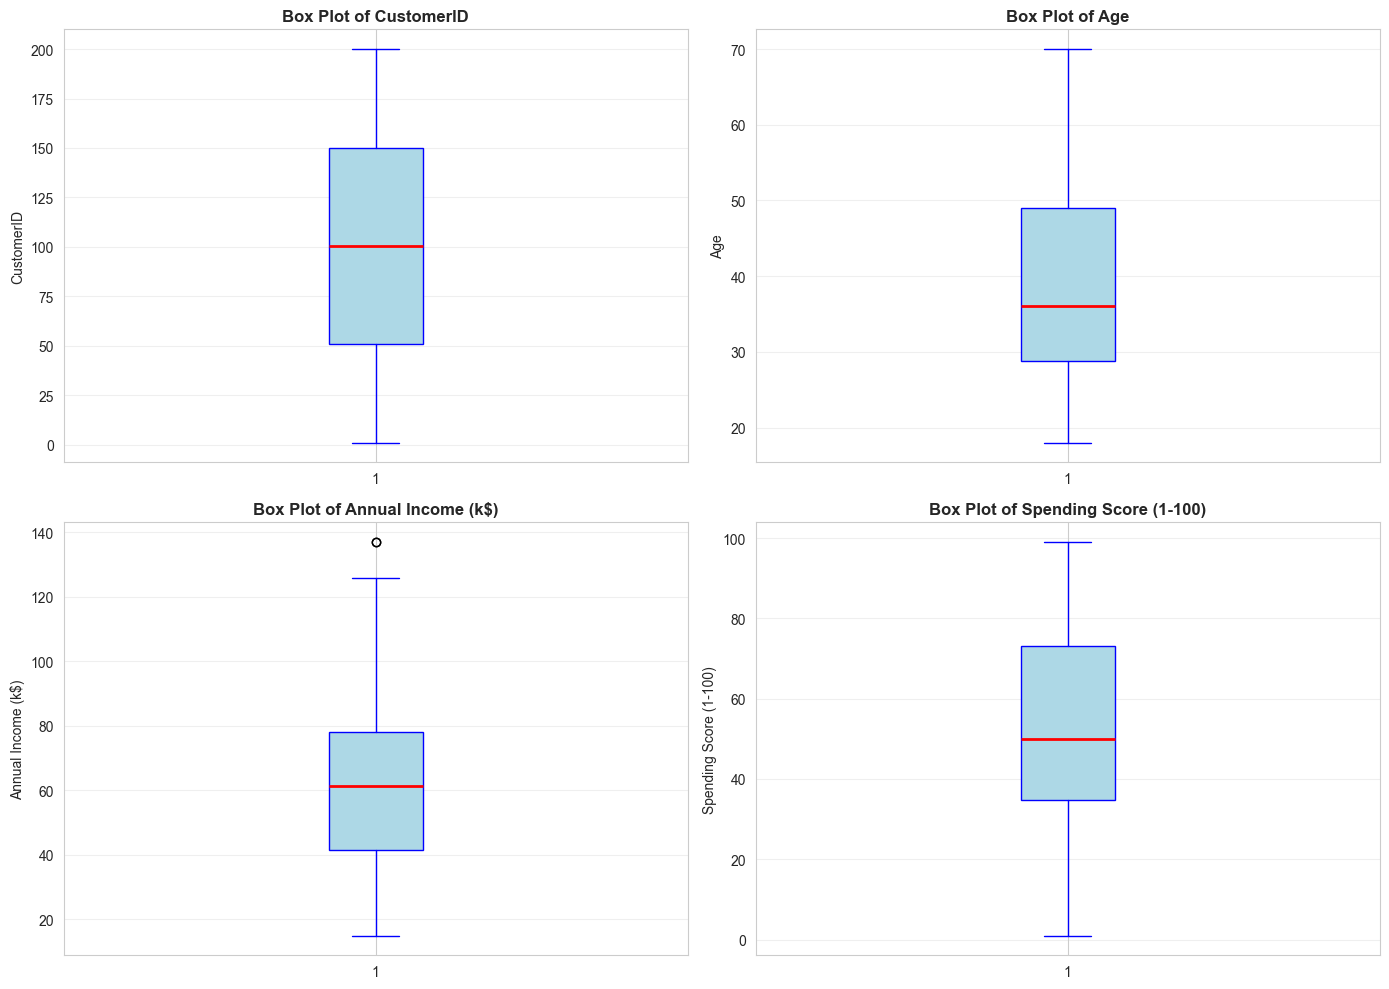

In [12]:
# Box plots for numerical features to identify outliers
fig, axes = plt.subplots(n_rows, 2, figsize=(14, 5*n_rows))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                      boxprops=dict(facecolor='lightblue', color='blue'),
                      whiskerprops=dict(color='blue'),
                      capprops=dict(color='blue'),
                      medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'Box Plot of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col, fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)

# Hide extra subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig(viz_dir / 'numerical_features_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

#### Outlier Identification

In [13]:
# Identify outliers using IQR method
def identify_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("Outlier Analysis (IQR Method):")
print("=" * 70)

for col in numerical_cols:
    outliers, lower, upper = identify_outliers_iqr(df, col)
    print(f"\n{col}:")
    print(f"  Lower Bound: {lower:.2f}")
    print(f"  Upper Bound: {upper:.2f}")
    print(f"  Number of outliers: {len(outliers)} ({(len(outliers)/len(df)*100):.2f}%)")
    if len(outliers) > 0:
        print(f"  Outlier values range: [{outliers[col].min():.2f}, {outliers[col].max():.2f}]")

Outlier Analysis (IQR Method):

CustomerID:
  Lower Bound: -98.50
  Upper Bound: 299.50
  Number of outliers: 0 (0.00%)

Age:
  Lower Bound: -1.62
  Upper Bound: 79.38
  Number of outliers: 0 (0.00%)

Annual Income (k$):
  Lower Bound: -13.25
  Upper Bound: 132.75
  Number of outliers: 2 (1.00%)
  Outlier values range: [137.00, 137.00]

Spending Score (1-100):
  Lower Bound: -22.62
  Upper Bound: 130.38
  Number of outliers: 0 (0.00%)


#### Correlation Analysis

In [14]:
# Compute correlation matrix
correlation_matrix = df[numerical_cols].corr()

print("Correlation Matrix:")
print("=" * 50)
print(correlation_matrix)

Correlation Matrix:
                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


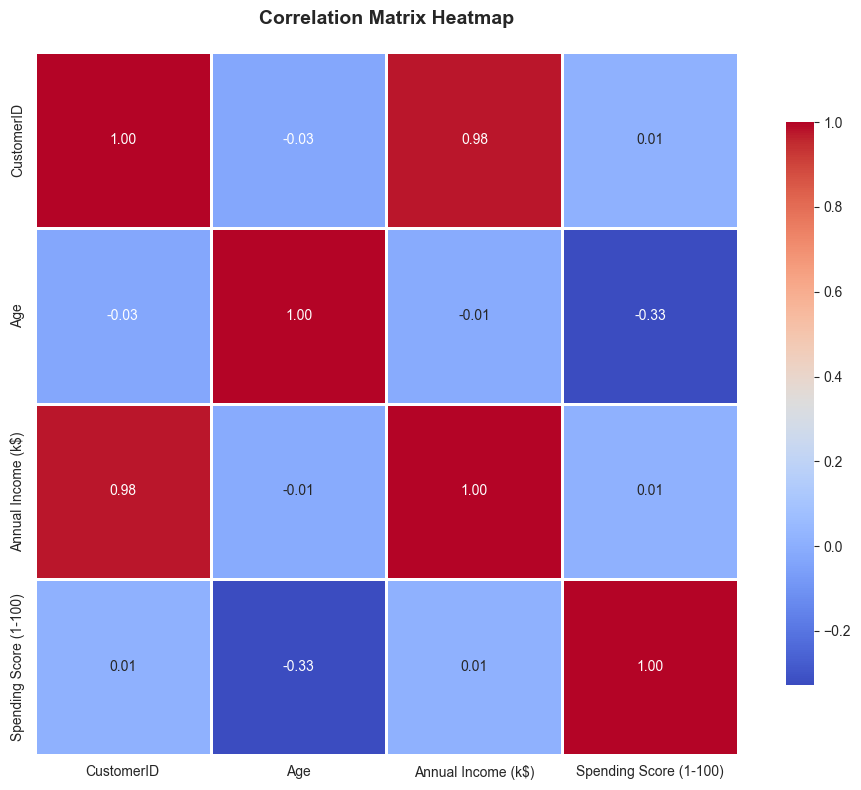

In [15]:
# Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(viz_dir / 'correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
# Find highly correlated feature pairs
def get_high_correlations(corr_matrix, threshold=0.7):
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append((
                    corr_matrix.columns[i],
                    corr_matrix.columns[j],
                    corr_matrix.iloc[i, j]
                ))
    return high_corr_pairs

high_corr = get_high_correlations(correlation_matrix, threshold=0.7)

print("\nHighly Correlated Feature Pairs (|r| > 0.7):")
print("=" * 50)
if high_corr:
    for feat1, feat2, corr_val in high_corr:
        print(f"{feat1} <-> {feat2}: {corr_val:.3f}")
else:
    print("No highly correlated feature pairs found.")


Highly Correlated Feature Pairs (|r| > 0.7):
CustomerID <-> Annual Income (k$): 0.978


#### Pairwise Scatter Plots

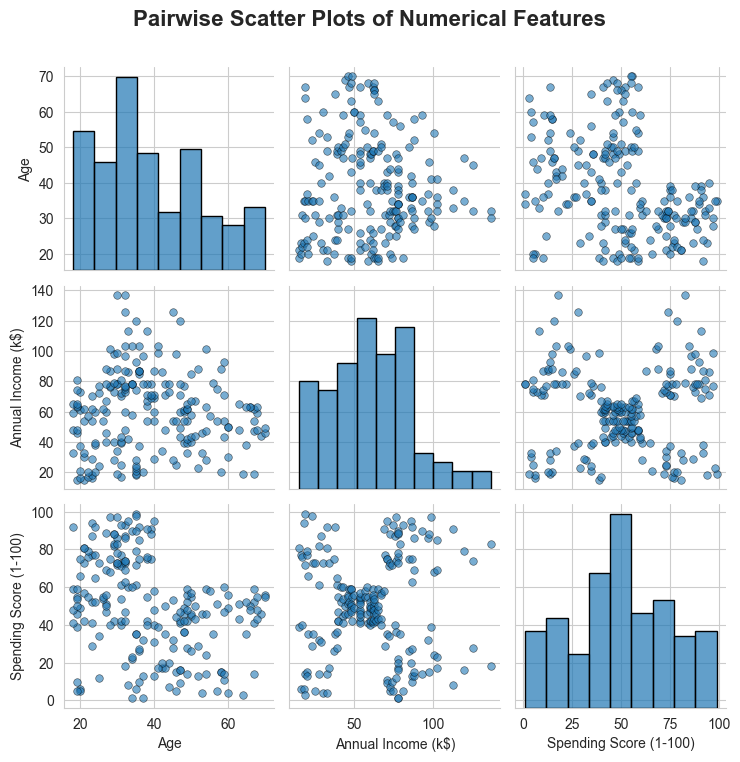

In [18]:
# Create pairwise scatter plot for numerical features
# Exclude ID column if present for better visualization
feature_cols = [col for col in numerical_cols if 'id' not in col.lower()]

if len(feature_cols) > 1:
    pairplot = sns.pairplot(df[feature_cols], diag_kind='hist', 
                            plot_kws={'alpha': 0.6, 's': 30, 'edgecolor': 'k'},
                            diag_kws={'edgecolor': 'k', 'alpha': 0.7})
    pairplot.fig.suptitle('Pairwise Scatter Plots of Numerical Features', 
                          fontsize=16, fontweight='bold', y=1.01)
    plt.tight_layout()
    plt.savefig(viz_dir / 'pairwise_scatter_plots.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("Not enough numerical features for pairwise scatter plots.")

#### Summary Statistics by Categorical Features

In [19]:
# Analyze numerical features grouped by categorical features
if len(categorical_cols) > 0 and len(feature_cols) > 0:
    for cat_col in categorical_cols:
        print(f"\nSummary Statistics by {cat_col}:")
        print("=" * 70)
        print(df.groupby(cat_col)[feature_cols].describe().round(2))
        print("\n")


Summary Statistics by Gender:
          Age                                              Annual Income (k$)  \
        count   mean    std   min    25%   50%   75%   max              count   
Gender                                                                          
Female  112.0  38.10  12.64  18.0  29.00  35.0  47.5  68.0              112.0   
Male     88.0  39.81  15.51  18.0  27.75  37.0  50.5  70.0               88.0   

               ...               Spending Score (1-100)                     \
         mean  ...    75%    max                  count   mean    std  min   
Gender         ...                                                           
Female  59.25  ...  77.25  126.0                  112.0  51.53  24.11  5.0   
Male    62.23  ...  78.00  137.0                   88.0  48.51  27.90  1.0   

                                
         25%   50%   75%   max  
Gender                          
Female  35.0  50.0  73.0  99.0  
Male    24.5  50.0  70.0  97.0  

[2 row

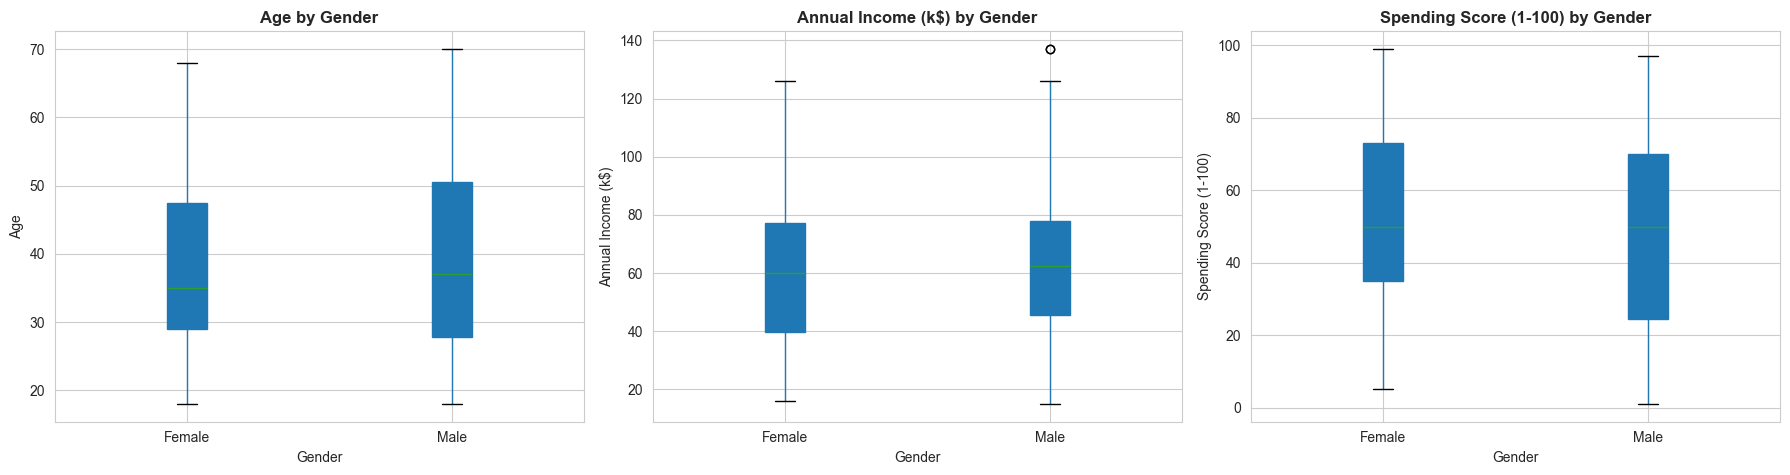

In [20]:
# Visualize numerical features by categorical features
if len(categorical_cols) > 0 and len(feature_cols) > 0:
    for cat_col in categorical_cols:
        n_features = len(feature_cols)
        fig, axes = plt.subplots(1, n_features, figsize=(6*n_features, 5))
        
        if n_features == 1:
            axes = [axes]
        
        for idx, num_col in enumerate(feature_cols):
            df.boxplot(column=num_col, by=cat_col, ax=axes[idx], patch_artist=True)
            axes[idx].set_title(f'{num_col} by {cat_col}', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel(cat_col, fontsize=10)
            axes[idx].set_ylabel(num_col, fontsize=10)
        
        plt.suptitle('')  # Remove the automatic title
        plt.tight_layout()
        plt.savefig(viz_dir / f'numerical_by_{cat_col}.png', dpi=300, bbox_inches='tight')
        plt.show()

#### Key Insights from EDA

In [21]:
# Summary of key findings
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("=" * 70)
print(f"\n1. Dataset Overview:")
print(f"   - Total samples: {df.shape[0]}")
print(f"   - Total features: {df.shape[1]}")
print(f"   - Numerical features: {len(numerical_cols)}")
print(f"   - Categorical features: {len(categorical_cols)}")

print(f"\n2. Data Quality:")
print(f"   - Missing values: {df.isnull().sum().sum()}")
print(f"   - Duplicate rows: {df.duplicated().sum()}")

print(f"\n3. Outliers Detected:")
for col in numerical_cols:
    outliers, _, _ = identify_outliers_iqr(df, col)
    if len(outliers) > 0:
        print(f"   - {col}: {len(outliers)} outliers ({(len(outliers)/len(df)*100):.2f}%)")

print(f"\n4. Feature Correlations:")
high_corr = get_high_correlations(correlation_matrix, threshold=0.7)
if high_corr:
    for feat1, feat2, corr_val in high_corr:
        print(f"   - {feat1} and {feat2}: {corr_val:.3f}")
else:
    print("   - No strong correlations (|r| > 0.7) detected")

print("\n" + "=" * 70)

KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

1. Dataset Overview:
   - Total samples: 200
   - Total features: 5
   - Numerical features: 4
   - Categorical features: 1

2. Data Quality:
   - Missing values: 0
   - Duplicate rows: 0

3. Outliers Detected:
   - Annual Income (k$): 2 outliers (1.00%)

4. Feature Correlations:
   - CustomerID and Annual Income (k$): 0.978



### Section 1.2: Data Preprocessing Pipeline

In this section, we'll:
- Select the features for clustering (Annual Income and Spending Score)
- Handle any missing values
- Scale/normalize the features
- Create two datasets: one with preprocessing and one without
- Visualize the selected features and their relationship

In [22]:
# Import preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

print("Preprocessing libraries imported successfully!")

Preprocessing libraries imported successfully!


#### Feature Selection

We'll focus on two key features for clustering:
- **Annual Income (k$)**: Customer's annual income
- **Spending Score (1-100)**: Score assigned by the mall based on customer behavior and spending nature

In [23]:
# Select the features for clustering
selected_features = ['Annual Income (k$)', 'Spending Score (1-100)']

# Check if these columns exist in the dataframe
print("Checking for selected features in dataset...")
print("=" * 50)
for feature in selected_features:
    if feature in df.columns:
        print(f"✓ {feature} found")
    else:
        print(f"✗ {feature} NOT found")
        print(f"Available columns: {df.columns.tolist()}")

print(f"\nSelected features: {selected_features}")
print(f"\nShape after feature selection: {df[selected_features].shape}")

Checking for selected features in dataset...
✓ Annual Income (k$) found
✓ Spending Score (1-100) found

Selected features: ['Annual Income (k$)', 'Spending Score (1-100)']

Shape after feature selection: (200, 2)


In [24]:
# Create the clustering dataset with selected features
X = df[selected_features].copy()

print("Clustering Dataset Created:")
print("=" * 50)
print(f"Shape: {X.shape}")
print(f"\nFirst few rows:")
print(X.head(10))
print(f"\nStatistical Summary:")
print(X.describe())

Clustering Dataset Created:
Shape: (200, 2)

First few rows:
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40
5                  17                      76
6                  18                       6
7                  18                      94
8                  19                       3
9                  19                      72

Statistical Summary:
       Annual Income (k$)  Spending Score (1-100)
count          200.000000              200.000000
mean            60.560000               50.200000
std             26.264721               25.823522
min             15.000000                1.000000
25%             41.500000               34.750000
50%             61.500000               50.000000
75%             78.000000               73.000000
max        

#### Check for Missing Values in Selected Features

In [25]:
# Check for missing values in selected features
print("Missing Values in Selected Features:")
print("=" * 50)
missing_in_X = X.isnull().sum()
print(missing_in_X)
print(f"\nTotal missing values: {X.isnull().sum().sum()}")

if X.isnull().sum().sum() > 0:
    print("\nHandling missing values...")
    # For this dataset, we'll drop rows with missing values
    X_clean = X.dropna()
    print(f"Rows before: {len(X)}")
    print(f"Rows after: {len(X_clean)}")
    print(f"Rows removed: {len(X) - len(X_clean)}")
    X = X_clean
else:
    print("\nNo missing values found. Proceeding with full dataset.")

Missing Values in Selected Features:
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Total missing values: 0

No missing values found. Proceeding with full dataset.


#### Visualize Selected Features Before Preprocessing

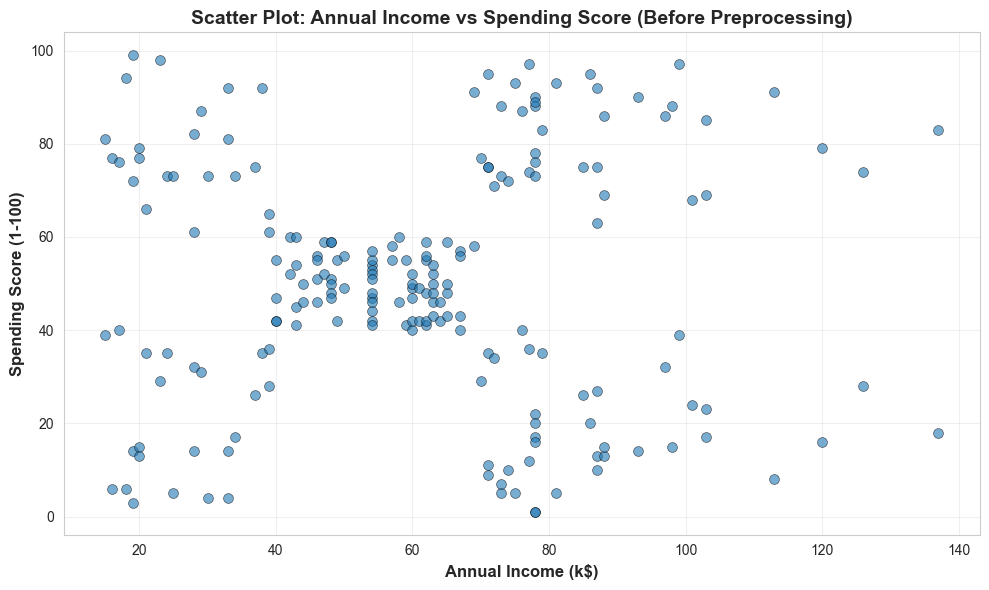

In [26]:
# Scatter plot of the two selected features
plt.figure(figsize=(10, 6))
plt.scatter(X[selected_features[0]], X[selected_features[1]], 
            alpha=0.6, s=50, edgecolor='k', linewidth=0.5)
plt.xlabel(selected_features[0], fontsize=12, fontweight='bold')
plt.ylabel(selected_features[1], fontsize=12, fontweight='bold')
plt.title('Scatter Plot: Annual Income vs Spending Score (Before Preprocessing)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(viz_dir / 'selected_features_scatter_before_preprocessing.png', dpi=300, bbox_inches='tight')
plt.show()

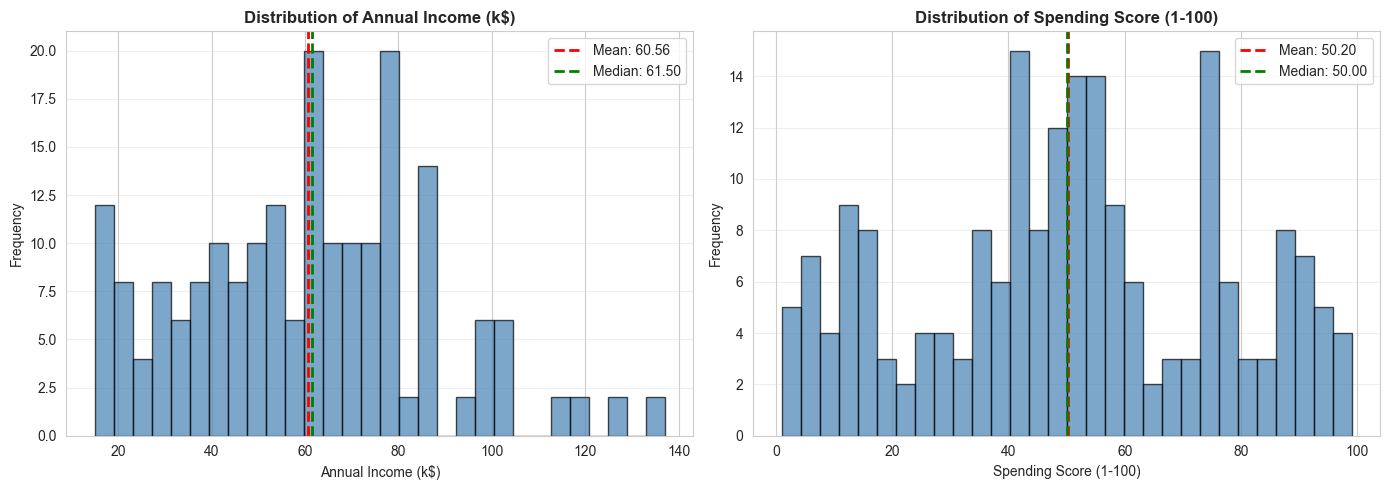

In [27]:
# Distribution plots for selected features
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, feature in enumerate(selected_features):
    axes[idx].hist(X[feature], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].axvline(X[feature].mean(), color='red', linestyle='--', linewidth=2, 
                      label=f'Mean: {X[feature].mean():.2f}')
    axes[idx].axvline(X[feature].median(), color='green', linestyle='--', linewidth=2, 
                      label=f'Median: {X[feature].median():.2f}')
    axes[idx].legend()
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(viz_dir / 'selected_features_distribution_before_preprocessing.png', dpi=300, bbox_inches='tight')
plt.show()

#### Create Two Datasets: With and Without Preprocessing

In [28]:
# Dataset 1: Without Preprocessing (Original Data)
X_original = X.copy()

print("Dataset 1: Without Preprocessing")
print("=" * 50)
print(f"Shape: {X_original.shape}")
print(f"\nStatistics:")
print(X_original.describe())

# Save for later use
print("\nDataset saved as 'X_original' for clustering without preprocessing.")

Dataset 1: Without Preprocessing
Shape: (200, 2)

Statistics:
       Annual Income (k$)  Spending Score (1-100)
count          200.000000              200.000000
mean            60.560000               50.200000
std             26.264721               25.823522
min             15.000000                1.000000
25%             41.500000               34.750000
50%             61.500000               50.000000
75%             78.000000               73.000000
max            137.000000               99.000000

Dataset saved as 'X_original' for clustering without preprocessing.


In [29]:
# Dataset 2: With Preprocessing (StandardScaler)
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier handling
X_scaled = pd.DataFrame(X_scaled, columns=selected_features, index=X.index)

print("Dataset 2: With Preprocessing (StandardScaler)")
print("=" * 50)
print(f"Shape: {X_scaled.shape}")
print(f"\nScaler parameters:")
print(f"  Mean: {scaler.mean_}")
print(f"  Standard Deviation: {np.sqrt(scaler.var_)}")
print(f"\nStatistics after scaling:")
print(X_scaled.describe())

# Save for later use
print("\nDataset saved as 'X_scaled' for clustering with preprocessing.")

Dataset 2: With Preprocessing (StandardScaler)
Shape: (200, 2)

Scaler parameters:
  Mean: [60.56 50.2 ]
  Standard Deviation: [26.19897708 25.75888196]

Statistics after scaling:
       Annual Income (k$)  Spending Score (1-100)
count        2.000000e+02            2.000000e+02
mean        -2.131628e-16           -1.465494e-16
std          1.002509e+00            1.002509e+00
min         -1.738999e+00           -1.910021e+00
25%         -7.275093e-01           -5.997931e-01
50%          3.587926e-02           -7.764312e-03
75%          6.656748e-01            8.851316e-01
max          2.917671e+00            1.894492e+00

Dataset saved as 'X_scaled' for clustering with preprocessing.


#### Visualize Scaled Features

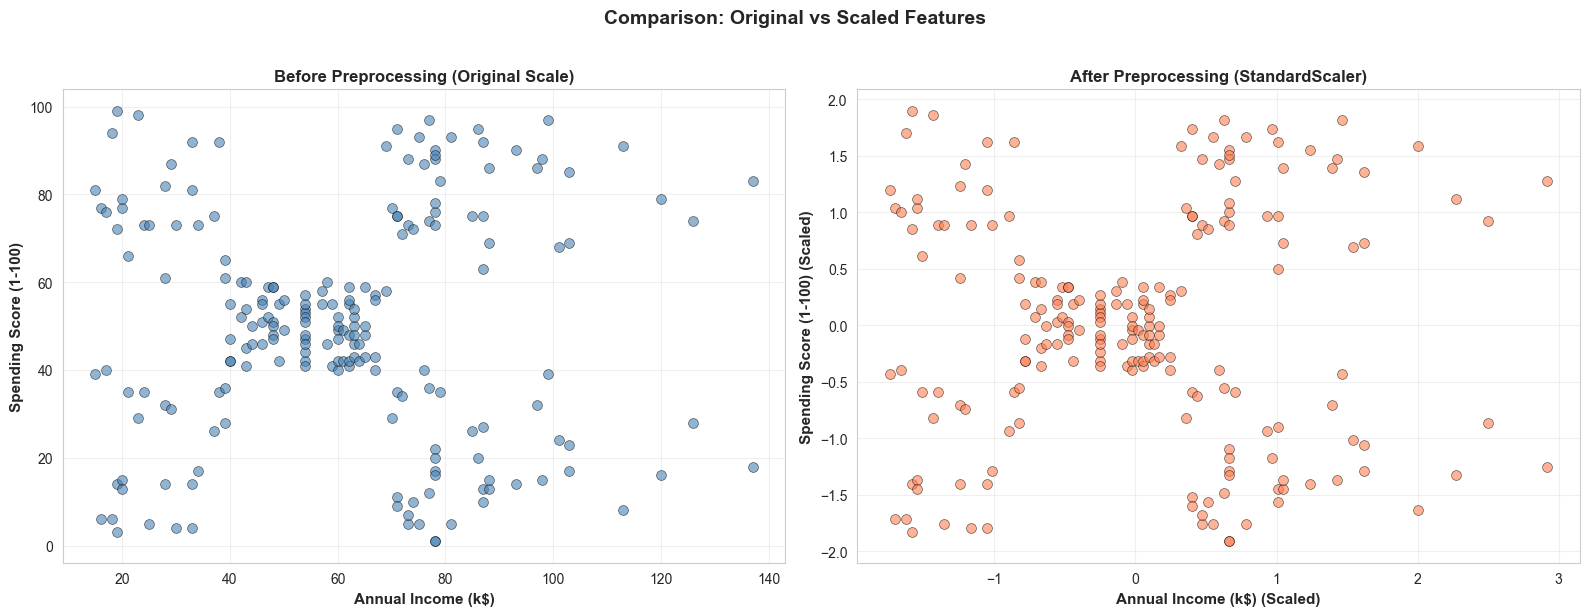

In [30]:
# Scatter plot comparison: Before and After Scaling
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Before scaling
axes[0].scatter(X_original[selected_features[0]], X_original[selected_features[1]], 
                alpha=0.6, s=50, edgecolor='k', linewidth=0.5, color='steelblue')
axes[0].set_xlabel(selected_features[0], fontsize=11, fontweight='bold')
axes[0].set_ylabel(selected_features[1], fontsize=11, fontweight='bold')
axes[0].set_title('Before Preprocessing (Original Scale)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# After scaling
axes[1].scatter(X_scaled[selected_features[0]], X_scaled[selected_features[1]], 
                alpha=0.6, s=50, edgecolor='k', linewidth=0.5, color='coral')
axes[1].set_xlabel(f'{selected_features[0]} (Scaled)', fontsize=11, fontweight='bold')
axes[1].set_ylabel(f'{selected_features[1]} (Scaled)', fontsize=11, fontweight='bold')
axes[1].set_title('After Preprocessing (StandardScaler)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.suptitle('Comparison: Original vs Scaled Features', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(viz_dir / 'preprocessing_comparison_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

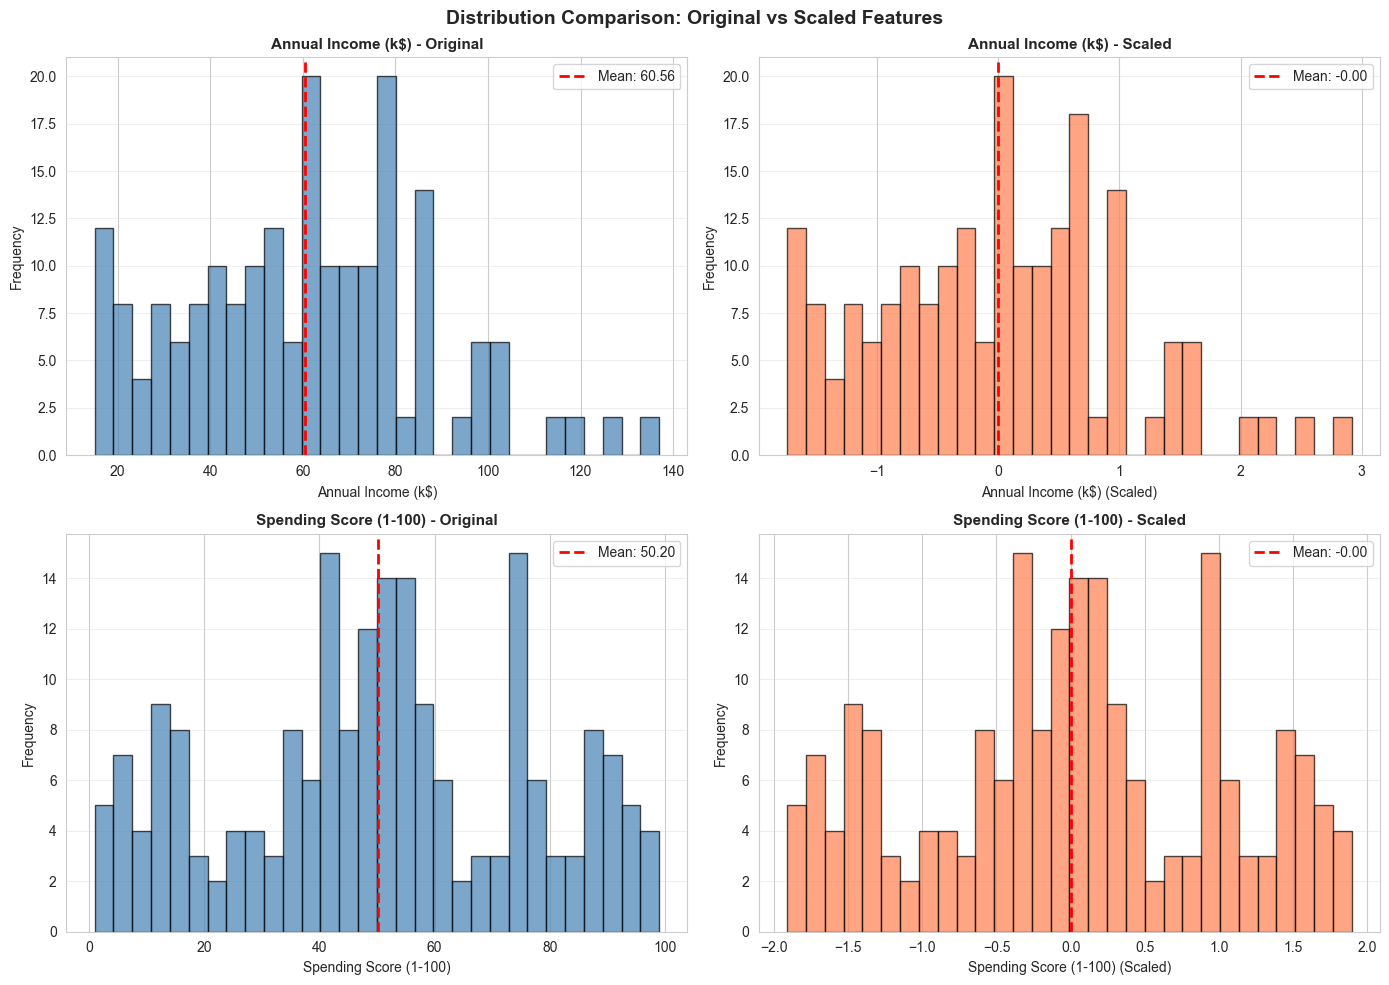

In [31]:
# Distribution comparison: Before and After Scaling
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, feature in enumerate(selected_features):
    # Before scaling
    axes[idx, 0].hist(X_original[feature], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx, 0].set_title(f'{feature} - Original', fontsize=11, fontweight='bold')
    axes[idx, 0].set_xlabel(feature, fontsize=10)
    axes[idx, 0].set_ylabel('Frequency', fontsize=10)
    axes[idx, 0].axvline(X_original[feature].mean(), color='red', linestyle='--', linewidth=2, 
                         label=f'Mean: {X_original[feature].mean():.2f}')
    axes[idx, 0].legend()
    axes[idx, 0].grid(axis='y', alpha=0.3)
    
    # After scaling
    axes[idx, 1].hist(X_scaled[feature], bins=30, color='coral', edgecolor='black', alpha=0.7)
    axes[idx, 1].set_title(f'{feature} - Scaled', fontsize=11, fontweight='bold')
    axes[idx, 1].set_xlabel(f'{feature} (Scaled)', fontsize=10)
    axes[idx, 1].set_ylabel('Frequency', fontsize=10)
    axes[idx, 1].axvline(X_scaled[feature].mean(), color='red', linestyle='--', linewidth=2, 
                         label=f'Mean: {X_scaled[feature].mean():.2f}')
    axes[idx, 1].legend()
    axes[idx, 1].grid(axis='y', alpha=0.3)

plt.suptitle('Distribution Comparison: Original vs Scaled Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(viz_dir / 'preprocessing_comparison_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

#### Data Preprocessing Summary

In [32]:
# Summary of preprocessing steps
print("DATA PREPROCESSING SUMMARY")
print("=" * 70)
print(f"\n1. Feature Selection:")
print(f"   - Selected features: {selected_features}")
print(f"   - Original dataset shape: {df.shape}")
print(f"   - Selected features shape: {X_original.shape}")

print(f"\n2. Missing Values:")
print(f"   - Missing values in selected features: {X_original.isnull().sum().sum()}")
print(f"   - Action taken: {'Dropped rows' if X_original.isnull().sum().sum() > 0 else 'No action needed'}")

print(f"\n3. Datasets Created:")
print(f"   - X_original (without preprocessing): {X_original.shape}")
print(f"     * Scale: Original units")
print(f"     * {selected_features[0]} range: [{X_original[selected_features[0]].min():.2f}, {X_original[selected_features[0]].max():.2f}]")
print(f"     * {selected_features[1]} range: [{X_original[selected_features[1]].min():.2f}, {X_original[selected_features[1]].max():.2f}]")

print(f"\n   - X_scaled (with StandardScaler): {X_scaled.shape}")
print(f"     * Scale: Standardized (mean=0, std=1)")
print(f"     * {selected_features[0]} range: [{X_scaled[selected_features[0]].min():.2f}, {X_scaled[selected_features[0]].max():.2f}]")
print(f"     * {selected_features[1]} range: [{X_scaled[selected_features[1]].min():.2f}, {X_scaled[selected_features[1]].max():.2f}]")

print(f"\n4. Ready for Clustering:")
print(f"   ✓ Two datasets prepared")
print(f"   ✓ No missing values")
print(f"   ✓ Features selected and scaled")
print(f"   ✓ Visualizations saved to '{viz_dir}' directory")

print("\n" + "=" * 70)
print("Section 1.2 Complete! Ready for clustering analysis.")
print("=" * 70)

DATA PREPROCESSING SUMMARY

1. Feature Selection:
   - Selected features: ['Annual Income (k$)', 'Spending Score (1-100)']
   - Original dataset shape: (200, 5)
   - Selected features shape: (200, 2)

2. Missing Values:
   - Missing values in selected features: 0
   - Action taken: No action needed

3. Datasets Created:
   - X_original (without preprocessing): (200, 2)
     * Scale: Original units
     * Annual Income (k$) range: [15.00, 137.00]
     * Spending Score (1-100) range: [1.00, 99.00]

   - X_scaled (with StandardScaler): (200, 2)
     * Scale: Standardized (mean=0, std=1)
     * Annual Income (k$) range: [-1.74, 2.92]
     * Spending Score (1-100) range: [-1.91, 1.89]

4. Ready for Clustering:
   ✓ Two datasets prepared
   ✓ No missing values
   ✓ Features selected and scaled
   ✓ Visualizations saved to 'visualizations' directory

Section 1.2 Complete! Ready for clustering analysis.


## Section 2: Baseline K-Means Clustering

In this section, we'll:
- Train K-Means models with K values from 2 to 12
- Use the Elbow Method to determine optimal K
- Analyze Silhouette Scores for different K values
- Visualize clusters for the optimal K
- Create silhouette plots
- Calculate comprehensive evaluation metrics

In [33]:
# Import clustering libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, silhouette_samples
import time

print("Clustering libraries imported successfully!")

Clustering libraries imported successfully!


### Training K-Means Models with Different K Values

We'll train K-Means models for K values ranging from 2 to 12 to find the optimal number of clusters.

In [34]:
# Initialize lists to store metrics
k_values = range(2, 13)  # K from 2 to 12
inertias = []
silhouette_scores_list = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
training_times = []
kmeans_models = {}

print("Training K-Means models for K = 2 to 12...")
print("=" * 70)

# Train K-Means for each K value
for k in k_values:
    # Start timing
    start_time = time.time()
    
    # Train K-Means (using scaled data for better performance)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    
    # End timing
    train_time = time.time() - start_time
    training_times.append(train_time)
    
    # Store the model
    kmeans_models[k] = kmeans
    
    # Calculate metrics
    labels = kmeans.labels_
    inertia = kmeans.inertia_
    silhouette = silhouette_score(X_scaled, labels)
    davies_bouldin = davies_bouldin_score(X_scaled, labels)
    calinski_harabasz = calinski_harabasz_score(X_scaled, labels)
    
    # Store metrics
    inertias.append(inertia)
    silhouette_scores_list.append(silhouette)
    davies_bouldin_scores.append(davies_bouldin)
    calinski_harabasz_scores.append(calinski_harabasz)
    
    print(f"K={k:2d} | Inertia: {inertia:7.2f} | Silhouette: {silhouette:.4f} | "
          f"Davies-Bouldin: {davies_bouldin:.4f} | Calinski-Harabasz: {calinski_harabasz:8.2f} | "
          f"Time: {train_time:.4f}s")

print("=" * 70)
print("Training complete!")

Training K-Means models for K = 2 to 12...
K= 2 | Inertia:  269.69 | Silhouette: 0.3213 | Davies-Bouldin: 1.2670 | Calinski-Harabasz:    95.67 | Time: 0.2599s
K= 3 | Inertia:  157.70 | Silhouette: 0.4666 | Davies-Bouldin: 0.7165 | Calinski-Harabasz:   151.34 | Time: 0.0371s
K= 4 | Inertia:  108.92 | Silhouette: 0.4939 | Davies-Bouldin: 0.7096 | Calinski-Harabasz:   174.60 | Time: 0.0400s
K= 5 | Inertia:   65.57 | Silhouette: 0.5547 | Davies-Bouldin: 0.5722 | Calinski-Harabasz:   248.65 | Time: 0.0441s
K= 6 | Inertia:   55.06 | Silhouette: 0.5399 | Davies-Bouldin: 0.6546 | Calinski-Harabasz:   243.09 | Time: 0.0532s
K= 7 | Inertia:   44.86 | Silhouette: 0.5281 | Davies-Bouldin: 0.7148 | Calinski-Harabasz:   254.62 | Time: 0.0465s
K= 8 | Inertia:   37.23 | Silhouette: 0.4552 | Davies-Bouldin: 0.7602 | Calinski-Harabasz:   267.28 | Time: 0.0506s
K= 9 | Inertia:   32.39 | Silhouette: 0.4571 | Davies-Bouldin: 0.7632 | Calinski-Harabasz:   270.95 | Time: 0.0480s
K=10 | Inertia:   29.98 | Sil

### Elbow Method: Inertia vs K

The Elbow Method helps us determine the optimal number of clusters by looking for the "elbow" point where the rate of decrease in inertia sharply changes.

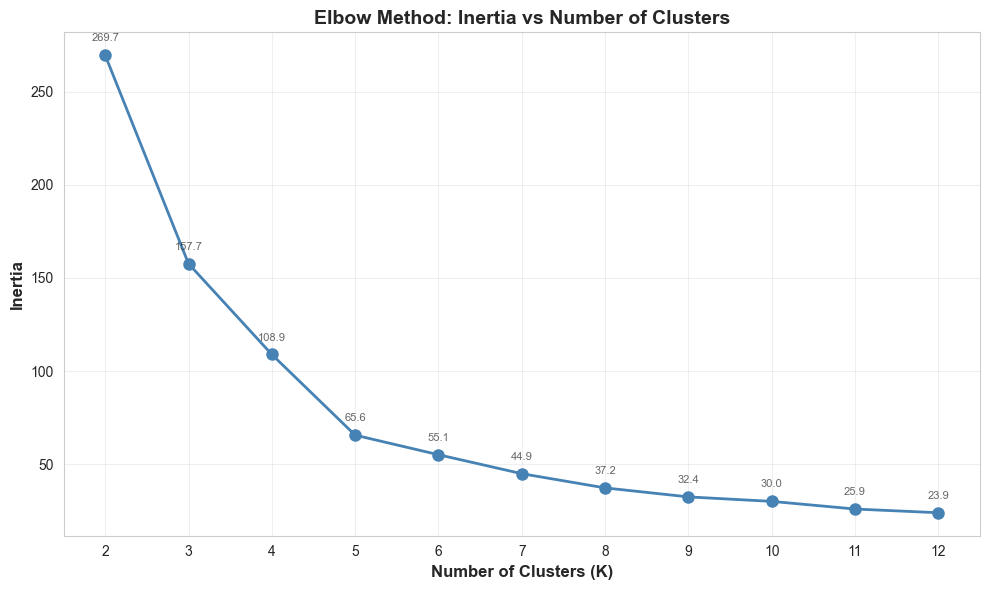


Elbow Analysis:
Look for the 'elbow' point where the inertia starts to decrease more slowly.
This indicates diminishing returns for adding more clusters.


In [35]:
# Elbow plot: Inertia vs K
plt.figure(figsize=(10, 6))
plt.plot(list(k_values), inertias, marker='o', linewidth=2, markersize=8, color='steelblue')
plt.xlabel('Number of Clusters (K)', fontsize=12, fontweight='bold')
plt.ylabel('Inertia', fontsize=12, fontweight='bold')
plt.title('Elbow Method: Inertia vs Number of Clusters', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(list(k_values))

# Annotate each point with its value
for i, (k, inertia) in enumerate(zip(k_values, inertias)):
    plt.annotate(f'{inertia:.1f}', 
                 xy=(k, inertia), 
                 xytext=(0, 10), 
                 textcoords='offset points',
                 ha='center',
                 fontsize=8,
                 alpha=0.7)

plt.tight_layout()
plt.savefig(viz_dir / 'kmeans_elbow_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nElbow Analysis:")
print("=" * 50)
print("Look for the 'elbow' point where the inertia starts to decrease more slowly.")
print("This indicates diminishing returns for adding more clusters.")

### Silhouette Score Analysis

The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. Higher values indicate better-defined clusters.

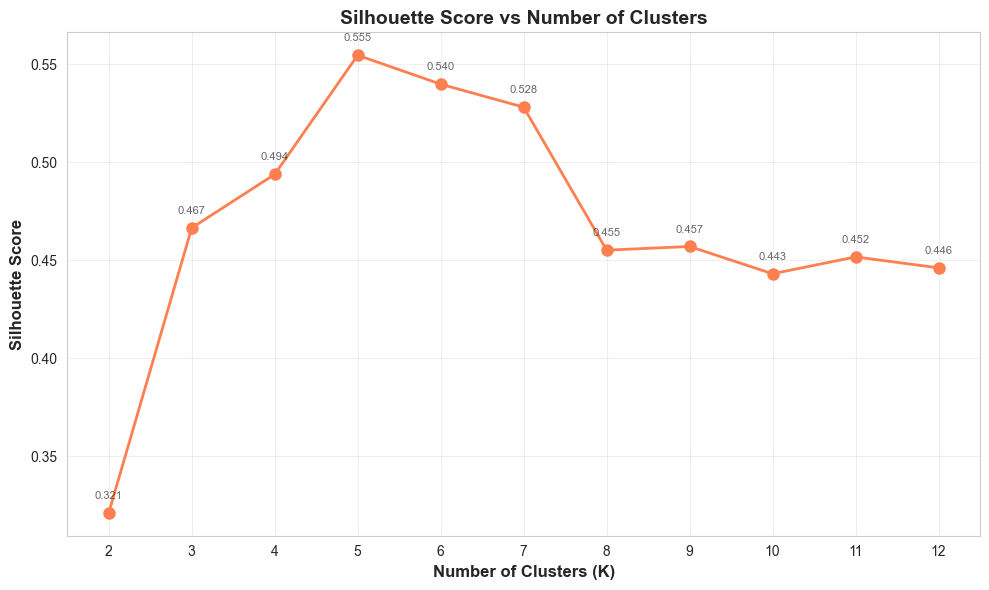


Optimal K based on Silhouette Score: K = 5
Maximum Silhouette Score: 0.5547


In [36]:
# Silhouette Score vs K
plt.figure(figsize=(10, 6))
plt.plot(list(k_values), silhouette_scores_list, marker='o', linewidth=2, markersize=8, color='coral')
plt.xlabel('Number of Clusters (K)', fontsize=12, fontweight='bold')
plt.ylabel('Silhouette Score', fontsize=12, fontweight='bold')
plt.title('Silhouette Score vs Number of Clusters', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(list(k_values))

# Annotate each point with its value
for i, (k, score) in enumerate(zip(k_values, silhouette_scores_list)):
    plt.annotate(f'{score:.3f}', 
                 xy=(k, score), 
                 xytext=(0, 10), 
                 textcoords='offset points',
                 ha='center',
                 fontsize=8,
                 alpha=0.7)

plt.tight_layout()
plt.savefig(viz_dir / 'kmeans_silhouette_vs_k.png', dpi=300, bbox_inches='tight')
plt.show()

# Find optimal K based on Silhouette Score
optimal_k_silhouette = list(k_values)[silhouette_scores_list.index(max(silhouette_scores_list))]
print(f"\nOptimal K based on Silhouette Score: K = {optimal_k_silhouette}")
print(f"Maximum Silhouette Score: {max(silhouette_scores_list):.4f}")

### Select Optimal K

Based on the Elbow Method and Silhouette Score analysis, we'll select the optimal number of clusters.

In [37]:
# Determine optimal K
# We'll use the K with the highest Silhouette Score
optimal_k = optimal_k_silhouette

print("OPTIMAL K SELECTION")
print("=" * 70)
print(f"\nBased on analysis:")
print(f"  - Silhouette Score suggests K = {optimal_k_silhouette}")
print(f"\nSelected Optimal K: {optimal_k}")
print(f"\nMetrics for K = {optimal_k}:")
idx = optimal_k - 2  # Adjust for 0-indexing
print(f"  - Inertia: {inertias[idx]:.2f}")
print(f"  - Silhouette Score: {silhouette_scores_list[idx]:.4f}")
print(f"  - Davies-Bouldin Index: {davies_bouldin_scores[idx]:.4f}")
print(f"  - Calinski-Harabasz Index: {calinski_harabasz_scores[idx]:.2f}")
print(f"  - Training Time: {training_times[idx]:.4f}s")
print("=" * 70)

# Get the optimal model
optimal_kmeans = kmeans_models[optimal_k]
optimal_labels = optimal_kmeans.labels_

print(f"\nCluster distribution for K = {optimal_k}:")
unique, counts = np.unique(optimal_labels, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count} samples ({count/len(optimal_labels)*100:.1f}%)")

OPTIMAL K SELECTION

Based on analysis:
  - Silhouette Score suggests K = 5

Selected Optimal K: 5

Metrics for K = 5:
  - Inertia: 65.57
  - Silhouette Score: 0.5547
  - Davies-Bouldin Index: 0.5722
  - Calinski-Harabasz Index: 248.65
  - Training Time: 0.0441s

Cluster distribution for K = 5:
  Cluster 0: 81 samples (40.5%)
  Cluster 1: 39 samples (19.5%)
  Cluster 2: 22 samples (11.0%)
  Cluster 3: 35 samples (17.5%)
  Cluster 4: 23 samples (11.5%)


### Cluster Visualizations

Visualize the clusters for the optimal K value on both the original and scaled data.

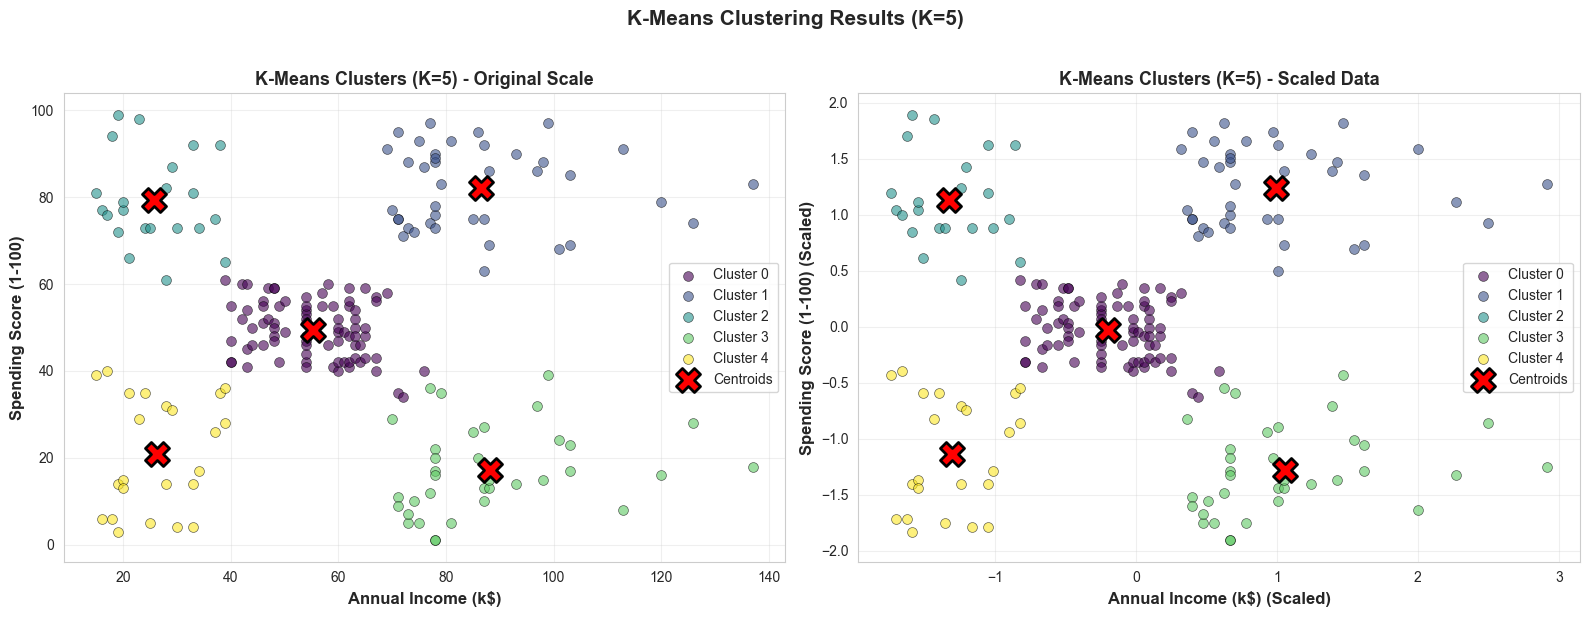

In [38]:
# Create a colormap for consistent cluster colors
colors = plt.cm.viridis(np.linspace(0, 1, optimal_k))

# Visualization on original scale
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Clusters on Original Scale
for cluster in range(optimal_k):
    cluster_points = X_original[optimal_labels == cluster]
    axes[0].scatter(cluster_points[selected_features[0]], 
                    cluster_points[selected_features[1]],
                    c=[colors[cluster]], 
                    label=f'Cluster {cluster}',
                    alpha=0.6, 
                    s=50, 
                    edgecolor='k', 
                    linewidth=0.5)

# Plot centroids (need to inverse transform from scaled space)
centroids_original = scaler.inverse_transform(optimal_kmeans.cluster_centers_)
axes[0].scatter(centroids_original[:, 0], 
                centroids_original[:, 1],
                c='red', 
                marker='X', 
                s=300, 
                edgecolor='black', 
                linewidth=2,
                label='Centroids',
                zorder=5)

axes[0].set_xlabel(selected_features[0], fontsize=12, fontweight='bold')
axes[0].set_ylabel(selected_features[1], fontsize=12, fontweight='bold')
axes[0].set_title(f'K-Means Clusters (K={optimal_k}) - Original Scale', fontsize=13, fontweight='bold')
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# Plot 2: Clusters on Scaled Data
for cluster in range(optimal_k):
    cluster_points = X_scaled[optimal_labels == cluster]
    axes[1].scatter(cluster_points[selected_features[0]], 
                    cluster_points[selected_features[1]],
                    c=[colors[cluster]], 
                    label=f'Cluster {cluster}',
                    alpha=0.6, 
                    s=50, 
                    edgecolor='k', 
                    linewidth=0.5)

# Plot centroids on scaled data
axes[1].scatter(optimal_kmeans.cluster_centers_[:, 0], 
                optimal_kmeans.cluster_centers_[:, 1],
                c='red', 
                marker='X', 
                s=300, 
                edgecolor='black', 
                linewidth=2,
                label='Centroids',
                zorder=5)

axes[1].set_xlabel(f'{selected_features[0]} (Scaled)', fontsize=12, fontweight='bold')
axes[1].set_ylabel(f'{selected_features[1]} (Scaled)', fontsize=12, fontweight='bold')
axes[1].set_title(f'K-Means Clusters (K={optimal_k}) - Scaled Data', fontsize=13, fontweight='bold')
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

plt.suptitle(f'K-Means Clustering Results (K={optimal_k})', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(viz_dir / f'kmeans_clusters_k{optimal_k}.png', dpi=300, bbox_inches='tight')
plt.show()

### Silhouette Plot for Optimal K

The silhouette plot visualizes how well each sample fits within its assigned cluster. Samples with high silhouette coefficients are well-matched to their clusters.

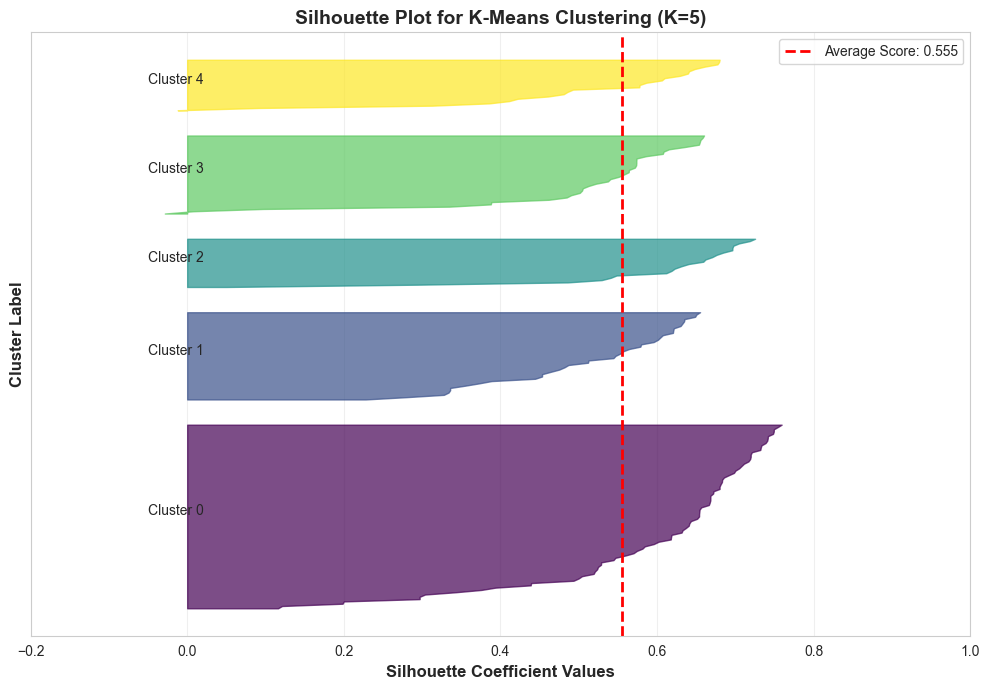


Silhouette Analysis for K = 5:
Average Silhouette Score: 0.5547

Per-Cluster Silhouette Scores:
  Cluster 0: Mean = 0.5979, Min = 0.1160, Max = 0.7591
  Cluster 1: Mean = 0.5108, Min = 0.2278, Max = 0.6549
  Cluster 2: Mean = 0.5982, Min = 0.0496, Max = 0.7252
  Cluster 3: Mean = 0.5052, Min = -0.0286, Max = 0.6600
  Cluster 4: Mean = 0.5105, Min = -0.0121, Max = 0.6799


In [39]:
# Silhouette plot for optimal K
silhouette_vals = silhouette_samples(X_scaled, optimal_labels)
silhouette_avg = silhouette_score(X_scaled, optimal_labels)

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

y_lower = 10
for i in range(optimal_k):
    # Get silhouette values for cluster i and sort them
    cluster_silhouette_vals = silhouette_vals[optimal_labels == i]
    cluster_silhouette_vals.sort()
    
    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = colors[i]
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Cluster {i}')
    
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10

ax.set_title(f'Silhouette Plot for K-Means Clustering (K={optimal_k})', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Silhouette Coefficient Values', fontsize=12, fontweight='bold')
ax.set_ylabel('Cluster Label', fontsize=12, fontweight='bold')

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="red", linestyle="--", linewidth=2, 
           label=f'Average Score: {silhouette_avg:.3f}')

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xlim([-0.2, 1])
ax.legend(loc='best')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig(viz_dir / f'kmeans_silhouette_plot_k{optimal_k}.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nSilhouette Analysis for K = {optimal_k}:")
print("=" * 50)
print(f"Average Silhouette Score: {silhouette_avg:.4f}")
print(f"\nPer-Cluster Silhouette Scores:")
for i in range(optimal_k):
    cluster_silhouette_vals = silhouette_vals[optimal_labels == i]
    print(f"  Cluster {i}: Mean = {cluster_silhouette_vals.mean():.4f}, "
          f"Min = {cluster_silhouette_vals.min():.4f}, "
          f"Max = {cluster_silhouette_vals.max():.4f}")

### K-Means Performance Summary

Comprehensive evaluation metrics and performance summary for the baseline K-Means model.

In [40]:
# Calculate prediction time (average time to predict cluster for all samples)
n_predictions = 100
prediction_times = []

for _ in range(n_predictions):
    start = time.time()
    _ = optimal_kmeans.predict(X_scaled)
    prediction_times.append(time.time() - start)

avg_prediction_time = np.mean(prediction_times)

# Compile comprehensive metrics
print("K-MEANS BASELINE MODEL - PERFORMANCE SUMMARY")
print("=" * 70)
print(f"\nOptimal Configuration:")
print(f"  - Number of Clusters (K): {optimal_k}")
print(f"  - Random State: 42")
print(f"  - n_init: 10")

print(f"\nCluster Distribution:")
for cluster in range(optimal_k):
    count = np.sum(optimal_labels == cluster)
    print(f"  - Cluster {cluster}: {count} samples ({count/len(optimal_labels)*100:.1f}%)")

print(f"\nEvaluation Metrics:")
print(f"  - Silhouette Score: {silhouette_scores_list[idx]:.4f}")
print(f"  - Davies-Bouldin Index: {davies_bouldin_scores[idx]:.4f} (lower is better)")
print(f"  - Calinski-Harabasz Index: {calinski_harabasz_scores[idx]:.2f} (higher is better)")
print(f"  - Inertia: {inertias[idx]:.2f}")

print(f"\nPerformance Metrics:")
print(f"  - Training Time: {training_times[idx]:.4f}s")
print(f"  - Average Prediction Time: {avg_prediction_time:.6f}s")
print(f"  - Prediction Time per Sample: {avg_prediction_time/len(X_scaled):.8f}s")

print(f"\nCluster Centroids (Original Scale):")
for i, centroid in enumerate(centroids_original):
    print(f"  - Cluster {i}: {selected_features[0]}={centroid[0]:.2f}, "
          f"{selected_features[1]}={centroid[1]:.2f}")

print("\n" + "=" * 70)
print("Section 2 Complete! Baseline K-Means model established.")
print("=" * 70)

K-MEANS BASELINE MODEL - PERFORMANCE SUMMARY

Optimal Configuration:
  - Number of Clusters (K): 5
  - Random State: 42
  - n_init: 10

Cluster Distribution:
  - Cluster 0: 81 samples (40.5%)
  - Cluster 1: 39 samples (19.5%)
  - Cluster 2: 22 samples (11.0%)
  - Cluster 3: 35 samples (17.5%)
  - Cluster 4: 23 samples (11.5%)

Evaluation Metrics:
  - Silhouette Score: 0.5547
  - Davies-Bouldin Index: 0.5722 (lower is better)
  - Calinski-Harabasz Index: 248.65 (higher is better)
  - Inertia: 65.57

Performance Metrics:
  - Training Time: 0.0441s
  - Average Prediction Time: 0.000426s
  - Prediction Time per Sample: 0.00000213s

Cluster Centroids (Original Scale):
  - Cluster 0: Annual Income (k$)=55.30, Spending Score (1-100)=49.52
  - Cluster 1: Annual Income (k$)=86.54, Spending Score (1-100)=82.13
  - Cluster 2: Annual Income (k$)=25.73, Spending Score (1-100)=79.36
  - Cluster 3: Annual Income (k$)=88.20, Spending Score (1-100)=17.11
  - Cluster 4: Annual Income (k$)=26.30, Spendin

## Section 3: Additional Clustering Models

In this section, we'll implement and compare four additional clustering algorithms:
- **K-Medoids**: More robust to outliers than K-Means
- **DBSCAN**: Density-based clustering that can find arbitrary-shaped clusters
- **Agglomerative Clustering**: Hierarchical clustering approach
- **Gaussian Mixture Models**: Probabilistic clustering model

For each model, we'll:
- Optimize parameters
- Train the model
- Calculate evaluation metrics
- Create visualizations
- Compare with K-Means baseline

In [ ]:
# Import additional clustering libraries
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage

print("Additional clustering libraries imported successfully!")

### Model 1: K-Medoids

K-Medoids is similar to K-Means but uses actual data points as cluster centers (medoids), making it more robust to outliers.

In [ ]:
# K-Medoids: Find optimal number of clusters
kmedoids_k_values = range(2, 13)
kmedoids_silhouettes = []
kmedoids_models = {}

print("K-Medoids: Testing different K values...")
print("=" * 70)

for k in kmedoids_k_values:
    kmedoids = KMedoids(n_clusters=k, random_state=42, method='pam')
    kmedoids_labels = kmedoids.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, kmedoids_labels)
    
    kmedoids_silhouettes.append(silhouette)
    kmedoids_models[k] = kmedoids
    
    print(f"K={k:2d} | Silhouette: {silhouette:.4f}")

# Find optimal K
optimal_kmedoids_k = kmedoids_k_values[kmedoids_silhouettes.index(max(kmedoids_silhouettes))]
print(f"\nOptimal K for K-Medoids: {optimal_kmedoids_k}")
print(f"Best Silhouette Score: {max(kmedoids_silhouettes):.4f}")
print("=" * 70)

In [ ]:
# Train final K-Medoids model with optimal K
start_time = time.time()
kmedoids_final = KMedoids(n_clusters=optimal_kmedoids_k, random_state=42, method='pam')
kmedoids_labels = kmedoids_final.fit_predict(X_scaled)
kmedoids_train_time = time.time() - start_time

# Calculate metrics
kmedoids_silhouette = silhouette_score(X_scaled, kmedoids_labels)
kmedoids_davies_bouldin = davies_bouldin_score(X_scaled, kmedoids_labels)
kmedoids_calinski_harabasz = calinski_harabasz_score(X_scaled, kmedoids_labels)
kmedoids_inertia = kmedoids_final.inertia_

# Calculate prediction time
pred_times = []
for _ in range(100):
    start = time.time()
    _ = kmedoids_final.predict(X_scaled)
    pred_times.append(time.time() - start)
kmedoids_pred_time = np.mean(pred_times)

print(f"\nK-Medoids Final Model (K={optimal_kmedoids_k}):")
print("=" * 70)
print(f"  Silhouette Score: {kmedoids_silhouette:.4f}")
print(f"  Davies-Bouldin Index: {kmedoids_davies_bouldin:.4f}")
print(f"  Calinski-Harabasz Index: {kmedoids_calinski_harabasz:.2f}")
print(f"  Inertia: {kmedoids_inertia:.2f}")
print(f"  Training Time: {kmedoids_train_time:.4f}s")
print(f"  Avg Prediction Time: {kmedoids_pred_time:.6f}s")
print(f"  Noise Points: 0")

unique, counts = np.unique(kmedoids_labels, return_counts=True)
print(f"\nCluster Distribution:")
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count} samples ({count/len(kmedoids_labels)*100:.1f}%)")

### Model 2: DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) can find arbitrarily-shaped clusters and identify noise points.

In [ ]:
# DBSCAN: K-distance plot for eps selection
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distances
distances = np.sort(distances[:, 4], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance', fontsize=12, fontweight='bold')
plt.ylabel('5th Nearest Neighbor Distance', fontsize=12, fontweight='bold')
plt.title('K-distance Plot for DBSCAN eps Selection', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(viz_dir / 'dbscan_k_distance_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("K-distance plot created. Look for the 'elbow' to determine eps value.")

In [ ]:
# DBSCAN: Parameter tuning
eps_values = [0.2, 0.3, 0.4, 0.5, 0.6]
min_samples_values = [3, 4, 5, 6]

best_silhouette = -1
best_params = {}
dbscan_results = []

print("DBSCAN: Testing different parameter combinations...")
print("=" * 70)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        # Only calculate silhouette if we have at least 2 clusters and not all noise
        if n_clusters >= 2 and n_noise < len(labels):
            # Filter out noise points for silhouette calculation
            mask = labels != -1
            if np.sum(mask) > 0:
                silhouette = silhouette_score(X_scaled[mask], labels[mask])
                
                dbscan_results.append({
                    'eps': eps,
                    'min_samples': min_samples,
                    'n_clusters': n_clusters,
                    'n_noise': n_noise,
                    'silhouette': silhouette
                })
                
                print(f"eps={eps:.1f}, min_samples={min_samples} | Clusters={n_clusters}, "
                      f"Noise={n_noise}, Silhouette={silhouette:.4f}")
                
                if silhouette > best_silhouette:
                    best_silhouette = silhouette
                    best_params = {'eps': eps, 'min_samples': min_samples}

print("=" * 70)
print(f"\nBest DBSCAN Parameters:")
print(f"  eps: {best_params['eps']}")
print(f"  min_samples: {best_params['min_samples']}")
print(f"  Best Silhouette Score: {best_silhouette:.4f}")

In [ ]:
# Train final DBSCAN model with optimal parameters
start_time = time.time()
dbscan_final = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
dbscan_labels = dbscan_final.fit_predict(X_scaled)
dbscan_train_time = time.time() - start_time

# Calculate metrics
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_dbscan = list(dbscan_labels).count(-1)

# Calculate metrics only on non-noise points
mask = dbscan_labels != -1
if np.sum(mask) > n_clusters_dbscan:
    dbscan_silhouette = silhouette_score(X_scaled[mask], dbscan_labels[mask])
    dbscan_davies_bouldin = davies_bouldin_score(X_scaled[mask], dbscan_labels[mask])
    dbscan_calinski_harabasz = calinski_harabasz_score(X_scaled[mask], dbscan_labels[mask])
else:
    dbscan_silhouette = 0.0
    dbscan_davies_bouldin = 0.0
    dbscan_calinski_harabasz = 0.0

# DBSCAN doesn't have inertia or prediction method
dbscan_inertia = None
dbscan_pred_time = None

print(f"\nDBSCAN Final Model:")
print("=" * 70)
print(f"  eps: {best_params['eps']}")
print(f"  min_samples: {best_params['min_samples']}")
print(f"  Number of Clusters: {n_clusters_dbscan}")
print(f"  Noise Points: {n_noise_dbscan} ({n_noise_dbscan/len(dbscan_labels)*100:.1f}%)")
print(f"  Silhouette Score: {dbscan_silhouette:.4f}")
print(f"  Davies-Bouldin Index: {dbscan_davies_bouldin:.4f}")
print(f"  Calinski-Harabasz Index: {dbscan_calinski_harabasz:.2f}")
print(f"  Training Time: {dbscan_train_time:.4f}s")

print(f"\nCluster Distribution:")
unique, counts = np.unique(dbscan_labels[dbscan_labels != -1], return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count} samples ({count/np.sum(mask)*100:.1f}%)")

### Model 3: Agglomerative Clustering

Agglomerative Clustering is a hierarchical clustering method that builds a hierarchy of clusters using a bottom-up approach.

In [ ]:
# Agglomerative Clustering: Create Dendrogram
linkage_matrix = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)', fontsize=14, fontweight='bold')
plt.xlabel('Sample Index', fontsize=12, fontweight='bold')
plt.ylabel('Distance', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig(viz_dir / 'agglomerative_dendrogram.png', dpi=300, bbox_inches='tight')
plt.show()

print("Dendrogram created. Use it to determine the optimal number of clusters.")

In [ ]:
# Agglomerative: Test different linkage methods and find optimal K
linkage_methods = ['ward', 'complete', 'average', 'single']
agg_results = {}

for method in linkage_methods:
    silhouettes = []
    k_range = range(2, 13)
    
    for k in k_range:
        agg = AgglomerativeClustering(n_clusters=k, linkage=method)
        labels = agg.fit_predict(X_scaled)
        silhouette = silhouette_score(X_scaled, labels)
        silhouettes.append(silhouette)
    
    agg_results[method] = {
        'silhouettes': silhouettes,
        'optimal_k': k_range[silhouettes.index(max(silhouettes))],
        'best_silhouette': max(silhouettes)
    }

print("Agglomerative Clustering: Linkage Method Comparison")
print("=" * 70)
for method, results in agg_results.items():
    print(f"{method.capitalize():12s} | Optimal K: {results['optimal_k']:2d} | "
          f"Silhouette: {results['best_silhouette']:.4f}")

# Select best linkage method
best_linkage = max(agg_results, key=lambda x: agg_results[x]['best_silhouette'])
optimal_agg_k = agg_results[best_linkage]['optimal_k']

print("=" * 70)
print(f"\nBest Linkage Method: {best_linkage}")
print(f"Optimal K: {optimal_agg_k}")
print(f"Best Silhouette Score: {agg_results[best_linkage]['best_silhouette']:.4f}")

In [ ]:
# Train final Agglomerative model
start_time = time.time()
agg_final = AgglomerativeClustering(n_clusters=optimal_agg_k, linkage=best_linkage)
agg_labels = agg_final.fit_predict(X_scaled)
agg_train_time = time.time() - start_time

# Calculate metrics
agg_silhouette = silhouette_score(X_scaled, agg_labels)
agg_davies_bouldin = davies_bouldin_score(X_scaled, agg_labels)
agg_calinski_harabasz = calinski_harabasz_score(X_scaled, agg_labels)
agg_inertia = None  # Agglomerative doesn't have inertia
agg_pred_time = None  # Agglomerative doesn't have predict method

print(f"\nAgglomerative Clustering Final Model (K={optimal_agg_k}):")
print("=" * 70)
print(f"  Linkage Method: {best_linkage}")
print(f"  Silhouette Score: {agg_silhouette:.4f}")
print(f"  Davies-Bouldin Index: {agg_davies_bouldin:.4f}")
print(f"  Calinski-Harabasz Index: {agg_calinski_harabasz:.2f}")
print(f"  Training Time: {agg_train_time:.4f}s")
print(f"  Noise Points: 0")

unique, counts = np.unique(agg_labels, return_counts=True)
print(f"\nCluster Distribution:")
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count} samples ({count/len(agg_labels)*100:.1f}%)")

### Model 4: Gaussian Mixture Models

GMM is a probabilistic model that assumes data points are generated from a mixture of Gaussian distributions.

In [ ]:
# GMM: Use BIC and AIC for model selection
n_components_range = range(2, 13)
bic_scores = []
aic_scores = []
covariance_types = ['full', 'tied', 'diag', 'spherical']

# Test different covariance types
cov_results = {}
for cov_type in covariance_types:
    bics = []
    aics = []
    for n in n_components_range:
        gmm = GaussianMixture(n_components=n, covariance_type=cov_type, random_state=42)
        gmm.fit(X_scaled)
        bics.append(gmm.bic(X_scaled))
        aics.append(gmm.aic(X_scaled))
    
    cov_results[cov_type] = {'bic': bics, 'aic': aics}

print("GMM: Covariance Type Comparison (BIC - Lower is Better)")
print("=" * 70)
for cov_type in covariance_types:
    min_bic = min(cov_results[cov_type]['bic'])
    optimal_n = n_components_range[cov_results[cov_type]['bic'].index(min_bic)]
    print(f"{cov_type.capitalize():12s} | Optimal Components: {optimal_n:2d} | "
          f"Min BIC: {min_bic:.2f}")

# Find best covariance type
best_cov_type = min(cov_results, key=lambda x: min(cov_results[x]['bic']))
optimal_gmm_n = n_components_range[cov_results[best_cov_type]['bic'].index(min(cov_results[best_cov_type]['bic']))]

print("=" * 70)
print(f"\nBest Covariance Type: {best_cov_type}")
print(f"Optimal Number of Components: {optimal_gmm_n}")
print(f"Best BIC Score: {min(cov_results[best_cov_type]['bic']):.2f}")

In [ ]:
# Train final GMM model
start_time = time.time()
gmm_final = GaussianMixture(n_components=optimal_gmm_n, covariance_type=best_cov_type, random_state=42)
gmm_final.fit(X_scaled)
gmm_labels = gmm_final.predict(X_scaled)
gmm_train_time = time.time() - start_time

# Calculate metrics
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)
gmm_davies_bouldin = davies_bouldin_score(X_scaled, gmm_labels)
gmm_calinski_harabasz = calinski_harabasz_score(X_scaled, gmm_labels)
gmm_bic = gmm_final.bic(X_scaled)
gmm_aic = gmm_final.aic(X_scaled)

# Calculate prediction time
pred_times = []
for _ in range(100):
    start = time.time()
    _ = gmm_final.predict(X_scaled)
    pred_times.append(time.time() - start)
gmm_pred_time = np.mean(pred_times)

print(f"\nGaussian Mixture Model Final (n_components={optimal_gmm_n}):")
print("=" * 70)
print(f"  Covariance Type: {best_cov_type}")
print(f"  Silhouette Score: {gmm_silhouette:.4f}")
print(f"  Davies-Bouldin Index: {gmm_davies_bouldin:.4f}")
print(f"  Calinski-Harabasz Index: {gmm_calinski_harabasz:.2f}")
print(f"  BIC: {gmm_bic:.2f}")
print(f"  AIC: {gmm_aic:.2f}")
print(f"  Training Time: {gmm_train_time:.4f}s")
print(f"  Avg Prediction Time: {gmm_pred_time:.6f}s")
print(f"  Noise Points: 0")

unique, counts = np.unique(gmm_labels, return_counts=True)
print(f"\nCluster Distribution:")
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count} samples ({count/len(gmm_labels)*100:.1f}%)")

### Visualization: All Models Comparison

Compare all clustering models visually in a 2x3 grid.

In [ ]:
# Create 2x3 grid comparing all models
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

models_data = [
    ('K-Means', optimal_labels, optimal_k),
    ('K-Medoids', kmedoids_labels, optimal_kmedoids_k),
    ('DBSCAN', dbscan_labels, n_clusters_dbscan),
    ('Agglomerative', agg_labels, optimal_agg_k),
    ('GMM', gmm_labels, optimal_gmm_n)
]

for idx, (name, labels, n_clusters) in enumerate(models_data):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # Handle DBSCAN noise points
    unique_labels = set(labels)
    colors_map = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
    
    for k, col_val in zip(unique_labels, colors_map):
        if k == -1:
            # Noise points in black
            col_val = 'black'
            marker = 'x'
            alpha = 0.3
            label = 'Noise'
        else:
            marker = 'o'
            alpha = 0.6
            label = f'Cluster {k}'
        
        class_member_mask = (labels == k)
        xy = X_original[class_member_mask]
        ax.scatter(xy[selected_features[0]], xy[selected_features[1]], 
                   c=[col_val], marker=marker, s=50, alpha=alpha, edgecolor='k', 
                   linewidth=0.5, label=label if k < 5 or k == -1 else '')
    
    ax.set_xlabel(selected_features[0], fontsize=10, fontweight='bold')
    ax.set_ylabel(selected_features[1], fontsize=10, fontweight='bold')
    ax.set_title(f'{name} (n_clusters={n_clusters})', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    if idx == 0:
        ax.legend(loc='best', fontsize=8)

# Hide the last subplot
axes[1, 2].axis('off')

plt.suptitle('Clustering Algorithms Comparison', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig(viz_dir / 'all_models_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("All models visualized successfully!")

### Section 3 Summary: All Models Performance Comparison

Comprehensive metrics table comparing all clustering algorithms.

In [ ]:
# Create comprehensive metrics table
metrics_data = {
    'Model': ['K-Means', 'K-Medoids', 'DBSCAN', 'Agglomerative', 'GMM'],
    'Silhouette': [
        silhouette_scores_list[idx],
        kmedoids_silhouette,
        dbscan_silhouette,
        agg_silhouette,
        gmm_silhouette
    ],
    'Davies-Bouldin': [
        davies_bouldin_scores[idx],
        kmedoids_davies_bouldin,
        dbscan_davies_bouldin,
        agg_davies_bouldin,
        gmm_davies_bouldin
    ],
    'Calinski-Harabasz': [
        calinski_harabasz_scores[idx],
        kmedoids_calinski_harabasz,
        dbscan_calinski_harabasz,
        agg_calinski_harabasz,
        gmm_calinski_harabasz
    ],
    'n_clusters': [
        optimal_k,
        optimal_kmedoids_k,
        n_clusters_dbscan,
        optimal_agg_k,
        optimal_gmm_n
    ],
    'Noise Points': [
        0,
        0,
        n_noise_dbscan,
        0,
        0
    ],
    'Train Time': [
        training_times[idx],
        kmedoids_train_time,
        dbscan_train_time,
        agg_train_time,
        gmm_train_time
    ],
    'Avg. Prediction Time': [
        avg_prediction_time,
        kmedoids_pred_time,
        0.0 if dbscan_pred_time is None else dbscan_pred_time,
        0.0 if agg_pred_time is None else agg_pred_time,
        gmm_pred_time
    ]
}

metrics_df = pd.DataFrame(metrics_data)

print("\nCLUSTERING MODELS - COMPREHENSIVE COMPARISON")
print("=" * 110)
print(metrics_df.to_string(index=False))
print("=" * 110)

# Highlight best performers
print("\nBest Performers:")
print(f"  Highest Silhouette Score: {metrics_df.loc[metrics_df['Silhouette'].idxmax(), 'Model']} ({metrics_df['Silhouette'].max():.4f})")
print(f"  Lowest Davies-Bouldin: {metrics_df.loc[metrics_df['Davies-Bouldin'].idxmin(), 'Model']} ({metrics_df['Davies-Bouldin'].min():.4f})")
print(f"  Highest Calinski-Harabasz: {metrics_df.loc[metrics_df['Calinski-Harabasz'].idxmax(), 'Model']} ({metrics_df['Calinski-Harabasz'].max():.2f})")
print(f"  Fastest Training: {metrics_df.loc[metrics_df['Train Time'].idxmin(), 'Model']} ({metrics_df['Train Time'].min():.4f}s)")

print("\n" + "=" * 110)
print("Section 3 Complete! All clustering models implemented and compared.")
print("=" * 110)